## Swarm Optimizations Hands-on Applications
**FIZ371 - Scientific & Technical Computations | 24/05/2021**

* Ant Colony Optimization
* **Artificial Bee Colony**

Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fun(x):
    return np.sin(x/2)/x +(-1)**np.round(x*1.25) * np.heaviside(x-2,1.5)*0.20

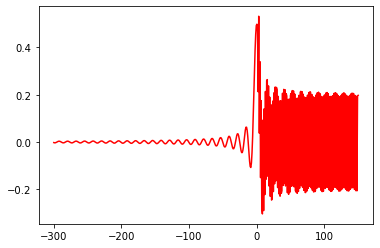

In [3]:
x_min = -300
x_max =  150
x_delta = x_max - x_min
neighbourhood = x_delta / 50

x = np.linspace(x_min,x_max,500)
y = fun(x)
plt.plot(x,y,"r-")
plt.show()

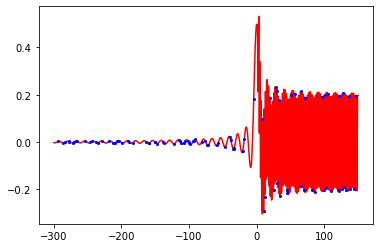

In [4]:
N = 100 # Number of bees

# Distribute the bees randomly
xs = x_min + np.random.rand(N) * x_delta
ys = fun(xs)

plt.plot(x,y,"r-")
plt.plot(xs,ys,"bo",markersize=2.0)
plt.show()

In [5]:
maxes = -np.sort(-ys)
print(maxes)

[ 0.23403234  0.21619961  0.21427205  0.2070134   0.20398596  0.2027654
  0.19949759  0.19709637  0.19357576  0.19325441  0.19289011  0.19194718
  0.18778734  0.18618732  0.18616816  0.18023746  0.17585771  0.09778483
  0.02050297  0.0130822   0.0109774   0.00843695  0.00685335  0.00514947
  0.004724    0.00469982  0.00469873  0.00447176  0.00435774  0.00426653
  0.00392963  0.00379671  0.00369867  0.00365416  0.00359185  0.00338443
  0.00327148  0.00305826  0.00249951  0.00235445  0.00162747  0.00123023
  0.00084977  0.00079688  0.00041176 -0.00059877 -0.00094254 -0.00120771
 -0.00121273 -0.00126783 -0.00131753 -0.00148389 -0.00265707 -0.00293559
 -0.0031484  -0.00329939 -0.00353481 -0.00365446 -0.00413324 -0.00415531
 -0.00431399 -0.00461799 -0.00469219 -0.00480359 -0.00520632 -0.00548269
 -0.0059618  -0.0066515  -0.00805686 -0.00809671 -0.01190658 -0.01289675
 -0.01376936 -0.0211035  -0.02644335 -0.02862773 -0.02898479 -0.03876826
 -0.17253579 -0.18616343 -0.19224171 -0.19389895 -0.

In [6]:
print(xs[ys > maxes[5]])


[127.88930082  30.38657935 105.94222971  65.22560969  28.70505025]


In [7]:
n_scouts = int(np.ceil(N/10))
n_supers = np.random.randint(n_scouts/2)+1
n_mehs   = n_scouts - n_supers
  
n_super_followers = np.random.randint(N*0.25,N*0.40)
n_meh_followers = int(N/2) - n_super_followers
n_random_fliers = N - n_super_followers - n_meh_followers

n_per_super_min = int(np.floor(n_super_followers/n_supers))
n_super_plus = n_super_followers - n_per_super_min * n_supers

n_per_meh_min = int(np.floor(n_meh_followers/n_mehs))
n_meh_plus = n_meh_followers - n_per_meh_min * n_mehs


print("There are {:} super-sites and {:} meh sites.\n"\
      .format(n_supers,n_mehs))
print("Number of followers allocated for the super sites: {}"\
     .format(n_super_followers))
print("There will be {:} per super site, with an overhead of {:}"\
     .format(n_per_super_min,n_super_plus))
print("-"*45)
print("Number of followers allocated for the meh sites: {}"\
     .format(n_meh_followers))
print("There will be {:} per meh site, with an overhead of {:}"\
     .format(n_per_meh_min,n_meh_plus))
print("\nThe range is [{:},{:}] and the neighbourhood is {:.2f}"\
     .format(x_min,x_max,neighbourhood))

There are 4 super-sites and 6 meh sites.

Number of followers allocated for the super sites: 35
There will be 8 per super site, with an overhead of 3
---------------------------------------------
Number of followers allocated for the meh sites: 15
There will be 2 per meh site, with an overhead of 3

The range is [-300,150] and the neighbourhood is 9.00


In [8]:
# supers
filter_super = ys > maxes[n_supers]
x_supers = xs[filter_super]
y_supers = ys[filter_super]
xy_supers = np.column_stack((x_supers.T,y_supers.T))
print(xy_supers)
print(x_supers,"\n",y_supers)

print("-"*45)

# mehs
filter_meh = np.logical_and(ys > maxes[n_supers+n_mehs]\
                            ,ys <= maxes[n_supers])
x_mehs = xs[filter_meh]
y_mehs = ys[filter_meh]
xy_mehs = np.column_stack((x_mehs,y_mehs))
print(xy_mehs)
print(x_mehs,"\n",y_mehs)

print(xy_mehs[xy_mehs[:,1].argsort()])

[[127.88930082   0.2070134 ]
 [ 30.38657935   0.21619961]
 [ 65.22560969   0.21427205]
 [ 28.70505025   0.23403234]]
[127.88930082  30.38657935  65.22560969  28.70505025] 
 [0.2070134  0.21619961 0.21427205 0.23403234]
---------------------------------------------
[[147.44729461   0.19325441]
 [105.94222971   0.20398596]
 [100.43000739   0.19949759]
 [ 49.97424035   0.19709637]
 [ 56.23636856   0.2027654 ]
 [136.10188122   0.19357576]]
[147.44729461 105.94222971 100.43000739  49.97424035  56.23636856
 136.10188122] 
 [0.19325441 0.20398596 0.19949759 0.19709637 0.2027654  0.19357576]
[[147.44729461   0.19325441]
 [136.10188122   0.19357576]
 [ 49.97424035   0.19709637]
 [100.43000739   0.19949759]
 [ 56.23636856   0.2027654 ]
 [105.94222971   0.20398596]]


In [9]:
xy_mehs

array([[147.44729461,   0.19325441],
       [105.94222971,   0.20398596],
       [100.43000739,   0.19949759],
       [ 49.97424035,   0.19709637],
       [ 56.23636856,   0.2027654 ],
       [136.10188122,   0.19357576]])

In [13]:
np.insert(xy_mehs,0,([4,5]),0)

array([[  4.        ,   5.        ],
       [147.44729461,   0.19325441],
       [105.94222971,   0.20398596],
       [100.43000739,   0.19949759],
       [ 49.97424035,   0.19709637],
       [ 56.23636856,   0.2027654 ],
       [136.10188122,   0.19357576]])

In [14]:
5%3

2